# Marketing Analysis on customer data

## This project uses customer data to produce insights and uncover relationships between the data and the overal objective - To improve customer satisfaction to increase runaway.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

^C


Let's begin by downloading the data, and listing the files within the dataset.

In [158]:
# Change this
dataset_url = 'https://www.kaggle.com/rodsaldanha/arketing-campaign' 

In [159]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./arketing-campaign" (use force=True to force download)


The dataset has been downloaded and extracted.

In [160]:
# Change this
data_dir = './arketing-campaign'

In [161]:
import os
os.listdir(data_dir)

['marketing_campaign.csv', 'marketing_campaign.xlsx']

Let us save and upload our work to Jovian before continuing.

In [162]:
project_name = "Marketing Analysis" # change this (use lowercase letters and hyphens only)

In [163]:
!pip install jovian --upgrade -q

In [164]:
import jovian

In [165]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'

## Data Preparation and Cleaning

**TODO** - Extracting the data from the kaggle website 



In [166]:
pwd = os.getcwd()

import pandas as pd
df = pd.read_csv(pwd+"/arketing-campaign/marketing_campaign.csv", sep = ';')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [167]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [168]:
# These columns are equal for all customers and will not be useful in comparison of the customers
LeastUseful_columns = ["Z_CostContact","Z_Revenue","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response"]


In [169]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [170]:
df['Income'].fillna(0,inplace = True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [171]:
type(df.columns)

pandas.core.indexes.base.Index

### The code below is to find the Age of each customer

In [173]:
df["Current_year"] = 2021
df["Age"] = df["Current_year"] - df["Year_Birth"]
df["Age"]

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: Age, Length: 2240, dtype: int64

### This is to find the total amount of purchases a customer has brought in

In [174]:
# total purchases
df.drop(columns = ["Current_year"],inplace = True)
purchases = list(df.columns[9:15])
df['Total_purchases']= df.apply(lambda x: x[purchases[0]]+ x[purchases[1]]+x[purchases[2]]+ x[purchases[3]]+x[purchases[4]]+ x[purchases[5]], axis = 1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,64,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,67,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,56,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,37,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,40,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,54,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,75,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,40,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,65,843


### Grouping all the Accepted complaints into one column in order to compare to amount of complaints

In [176]:
Accepted = list(df.columns[20:25])
Accepted
df["Accepted_complaints"] = df.apply(lambda x: x[Accepted[0]]+x[Accepted[1]]+x[Accepted[2]]+x[Accepted[3]]+x[Accepted[4]], axis = 1)
df["Accepted_complaints"]

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Accepted_complaints, Length: 2240, dtype: int64

In [177]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [178]:
import jovian

In [179]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'

In [180]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Using a density plot to show the age distribution among the customers

<AxesSubplot:ylabel='Density'>

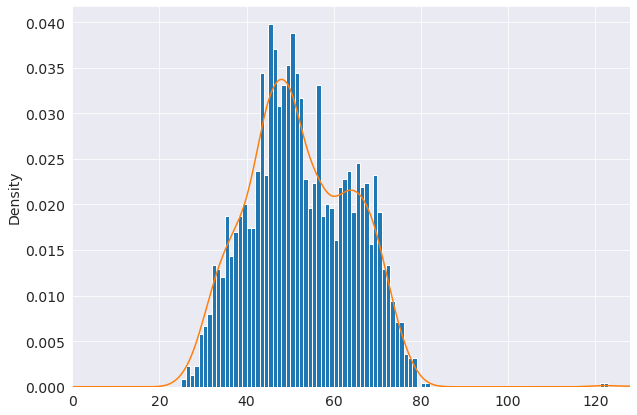

In [181]:
#Density plots
ax = df["Age"].plot.hist(density = True,xlim = [0,128],bins = range(1,128))
df['Age'].plot.density(ax=ax)


### The Graph belo shows that most of the customers are between the age of 25 and 80

## Histogram to show the distribution of the total purchases.

(array([1255.,  397.,  353.,  191.,   44.]),
 array([   5.,  509., 1013., 1517., 2021., 2525.]),
 <BarContainer object of 5 artists>)

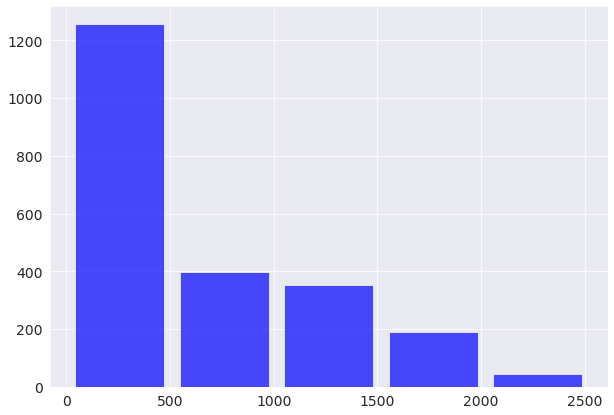

In [182]:
plt.hist(x = df["Total_purchases"],bins = 5,color = 'blue',alpha = 0.7,rwidth= 0.85)
# most of the customers make purchases less than 500

## most of the customers make purchases less than 500 rate of currency

## Bar chart on marital status of our customers

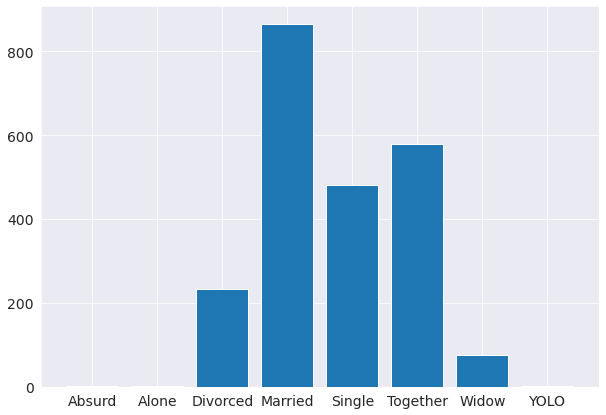

In [183]:
Marital_Data = df.groupby("Marital_Status")["ID"].count().reset_index()
plt.bar(Marital_Data['Marital_Status'],Marital_Data["ID"])
plt.show()

## Clearly most of the customers are Either together or married with Absurd,Alone and Yolo clearly unrepresented but relevant

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<BarContainer object of 5 artists>

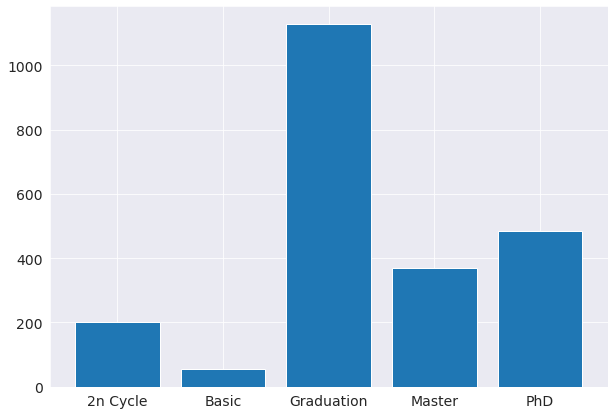

In [184]:
Education_Data = df.groupby("Education")["ID"].count().reset_index()
Education_Data
plt.bar(Education_Data["Education"],Education_Data["ID"])

## Education level of the customers is very important since it can relate to other metrics like Income and Age
## Most of our customers and by far have gone through grad school 
### Also shows that almost all of our customers are very well educated

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [185]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Using the pie chart from plotly one is able to compare single unique values with others
## This can be done by clicking one unique value in order to remove it from the piechart and clicking it again to bring it back into consideration.

In [186]:
import plotly.express as px # is a visualization library used to make more interactive visualizations
Education_analysis = df.groupby('Education')['ID'].count().reset_index()
pie_chart = px.pie(Education_analysis,
                    title = "Customers Education Distribution",
                    values = 'ID',
                    names = 'Education')

pie_chart


In [187]:
Marital_analysis = df.groupby('Marital_Status')['ID'].count().reset_index()
pie_chart = px.pie(Marital_analysis,
                    title = "Customers Marital Distribution",
                    values = 'ID',
                    names = 'Marital_Status')

pie_chart

Let us save and upload our work to Jovian before continuing

In [188]:
import jovian

In [189]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'

## Q1:  #1 What are the favourite products for the customers

In [190]:




data = df.copy()
cols = list(data.columns[0:9])
cols2 =  list(data.columns[15:])

cols.extend(cols2)
data.drop(columns=cols,inplace=True)
max_data = data.idxmax(axis=1)
df["favourite_product"]=max_data

## We Have created a new column that contains the most bought product by each customer in order to gauge each line of product`s populatity

In [191]:
df.drop(columns=LeastUseful_columns)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_purchases,Accepted_complaints,Children,favourite_product
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,64,1617,0,0,MntWines
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,67,27,0,2,MntWines
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,56,776,0,0,MntWines
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,37,53,0,1,MntMeatProducts
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,40,422,0,1,MntWines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,2,9,3,4,5,54,1341,0,1,MntWines
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,8,2,5,7,75,444,1,3,MntWines
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,2,3,13,6,40,1241,1,0,MntWines
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,2,6,5,10,3,65,843,0,1,MntWines


In [192]:
product_analysis = df.groupby("favourite_product")["ID"].count().reset_index()
productpie_chart = px.pie(product_analysis,
                    title = "product Distribution",
                    values = 'ID',
                    names = 'favourite_product')

productpie_chart

## The pie chart shows the popularity of our groups of products with Mnt wines the clear favourite and MntFruits the least favourite
## This can help us inquire on the quality of our products according to popularity to improve customer satisfaction and generate more sales.
## Although we have found the most bought product by each customer, there is still alot of metrics i.e(Price,Benefits) that have to be factored in order to fully evaluate popularity of a product

## Q2:   Does having kids affect the total purchases of a customer

In [193]:
kidsColumns = ["Kidhome","Teenhome"]
LeastUseful_columns.extend(kidsColumns)
df.drop(columns= LeastUseful_columns,inplace = True)

In [194]:
df[df["Children"] > 0].groupby("Total_purchases")["Children"].count().sort_values().reset_index()



,Total_purchases,Children
0,5,1
1,764,1
2,766,1
3,767,1
4,770,1
...,...,...
722,55,14
723,57,15
724,44,15
725,46,16


## Children is not a reliable metric to relate to total purchases of products

## Q3: Probability of web purchases after web visits

In [195]:

# number of web purchases/Total number of web visits


df[df["NumWebPurchases"]>-1]["NumWebVisitsMonth"].mean()


5.316517857142857

In [196]:
TotalWebPurchases = df["NumWebPurchases"].sum()
TotalCatalogPurchases = df["NumCatalogPurchases"].sum()
TotalDealPurchases = df["NumDealsPurchases"].sum()
print("WebPurchases: {0}\n CatalogPurchases: {1}\n DealsPurchases: {2}".format(TotalWebPurchases,TotalCatalogPurchases,TotalDealPurchases))

WebPurchases: 9150
 CatalogPurchases: 5963
 DealsPurchases: 5208


## The probability shows that the online  purchases are guaranteed after web visits for most of the customers
### The website is a success. i.e it is able to generate more sales as per web visits which is clearly its main purpose. Also because it is the most successful alternate sales generators in the data
### If there were more historical data it would be easy to see the trend of total purchases after introduction of the websites


## Q4  - What are the characteristic of the customers responsible for most of the purchases and the least purchases
## Compare with highest and lowest customers types of customers

In [197]:
Frequency_table = df.copy()
Frequency_table["freq"]=pd.cut(df["Total_purchases"],10)
Frequencies = Frequency_table.groupby("freq")["ID"].count().reset_index()
Frequencies = Frequencies["freq"]



## Customers with the highest frequency of purchases

In [198]:
Frequency_table.select_dtypes(include="number")[Frequency_table["freq"] == Frequencies[9]].mean().reset_index()

,index,0
0,ID,5134.083333
1,Year_Birth,1967.250000
2,Income,85754.750000
3,Recency,54.666667
4,MntWines,1129.750000
5,MntFruits,88.166667
6,MntMeatProducts,796.083333
7,MntFishProducts,148.583333
8,MntSweetProducts,101.500000
9,MntGoldProds,128.666667


In [199]:
Frequency_table.select_dtypes(exclude="number")[Frequency_table["freq"] == Frequencies[9]].max().reset_index()

,index,0
0,Education,PhD
1,Marital_Status,Together
2,Dt_Customer,2014-02-13
3,favourite_product,MntWines
4,freq,"(2273.0, 2525.0]"


## Customers with the least frequency of purchases

In [200]:
Frequency_table.select_dtypes(include="number")[Frequency_table["freq"] == Frequencies[0]].mean().reset_index()

,index,0
0,ID,5659.408480
1,Year_Birth,1971.210962
2,Income,34483.664943
3,Recency,49.047570
4,MntWines,33.107549
5,MntFruits,4.220269
6,MntMeatProducts,18.927611
7,MntFishProducts,5.916236
8,MntSweetProducts,4.297828
9,MntGoldProds,12.841779


In [201]:
Frequency_table.select_dtypes(exclude="number")[Frequency_table["freq"] == Frequencies[0]].max().reset_index()

,index,0
0,Education,PhD
1,Marital_Status,Widow
2,Dt_Customer,2014-06-29
3,favourite_product,MntWines
4,freq,"(2.48, 257.0]"


### 'Count' = Low purchases customers:967 ,High purchase customers: 12

### 'Education' = In both categories most of the customers have attained a Phd

### 'Marital_Status' = In the customers with low purchases most of them are widows While in the high purchase category most of them are together

### 'Income' = Average income for low purchase customers is :34483.664943 ,Average income for high purchase customers is :85754.750000

### 'Recency' = Recency of the high category is 54.67 while recency of the low category is 49.05

### 'MntWines' = low purchase customers average for this product is :33.107549 ,high purchase customers average for this product is :1129.750000

### 'MntFruits' = low purchase customers average for this product is :4.220269 ,high purchase customers average for this product is :88.166667

### 'MntMeatProducts' = low purchase customers average for this product is :18.927611 ,high purchase customers average for this product is :796.083333

### 'MntFishProducts' = low purchase customers average for this product is :5.916236 ,high purchase customers average for this product is :148.583333

### 'MntSweetProducts' = low purchase customers average for this product is :4.297828 ,high purchase customers average for this product is :101.500000

### 'MntGoldProds' = low purchase customers average for this product is :12.841779 ,high purchase customers average for this product is :128.666667

### 'Web activity' = There is a greater probability for high purchase customer to buy a product after web visit than low purchase customers

### 'Age' = Average age of low purchase customers is :50 , Average age of high purchase customers is : 54

### 'Total_purchases' = Average total purchases of low purchase customers is:79.3 , Average total purchases of high purchase customers is : 2392.75 Which is also represented in 
the categories
### 'Children' = high value customers basically have no children while the low value ones have an average of 1 child per customer

### 'favourite_product' = MntWines is the favourite for both categories.


In [202]:
import jovian

In [203]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'

## Q1: I was able to determine the most popular product for each customer, however more data is needed to determine why e.g(Price,Benefits)

## Q2: Checking whether having children affects any other column of the dataset. Having children is very random in the dataset and cannot be used to determine relationships in the data

## Q3:This was to gauge the success rate of the website by calculating the probability of web purchases after web visits. I concluded that it was a success and even compared it to other sales generating techniques used i.e(Deals and catalogs) and it was still the most successful. However having historic data of the same can be used to establish trends in web activity of the customers

## Q4: Comparing the total purchase frequency of the lowest and highest purchase customers. This is to try and establish reasons for this and find our whether we can do anything about it. The data is a bit mixed since more of our customers are in the lower section than those in the higher one so it is very hard to find solutions since both generate a fair amount of income for the entity




## in conclusion More data would be useful in finding more relationships and trends

In [204]:
import jovian

In [205]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'

In [206]:
import jovian

In [207]:
jovian.commit(filename='zerotopandas-course-project.ipynb')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "collinsmutai70/zerotopandas-course-project-starter" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter


'https://jovian.ai/collinsmutai70/zerotopandas-course-project-starter'